In [ ]:
#https://datahub.io/core/world-cities

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [44]:
#import the csv fil 
cities = pd.read_csv('world-cities_csv.csv')
cities.head(100)

,name,country,subcountry,geonameid
0,les Escaldes,Andorra,Escaldes-Engordany,3040051
1,Andorra la Vella,Andorra,Andorra la Vella,3041563
2,Umm al Qaywayn,United Arab Emirates,Umm al Qaywayn,290594
3,Ras al-Khaimah,United Arab Emirates,Raʼs al Khaymah,291074
4,Khawr Fakkān,United Arab Emirates,Ash Shāriqah,291696
...,...,...,...,...
95,Vanadzor,Armenia,Lori Province,616530
96,Gavarr,Armenia,Gegharkunik Province,616599
97,Hrazdan,Armenia,Kotayk Province,616629
98,Armavir,Armenia,Armavir Province,616631


In [48]:
#check the data, filter out United States and change the column names to City and State
us_cities = cities[cities['country'] == 'United States'].rename(columns={'name': 'City', 'subcountry': 'State'})
us_cities                

,City,country,State,geonameid
19731,Fort Hunt,United States,Virginia,4046704
19732,Bessemer,United States,Alabama,4048023
19733,Paducah,United States,Kentucky,4048662
19734,Birmingham,United States,Alabama,4049979
19735,Center Point,United States,Alabama,4054378
...,...,...,...,...
22425,Hot Springs National Park,United States,Arkansas,8605040
22426,Dixiana,United States,Alabama,8605041
22427,Cranberry Township,United States,Pennsylvania,8643098
22428,Silver Lake,United States,California,10104153


In [54]:
us_cities.shape[0] 

#validate the data for accuracy and prep the data for visualization
us_cities.groupby(['State']).size().reset_index(name='city_count').sort_values(by=['State'])



,State,city_count
0,Alabama,35
1,Alaska,5
2,Arizona,49
3,Arkansas,28
4,California,368
5,Colorado,44
6,Connecticut,18
7,Delaware,5
8,Florida,227
9,Georgia,69


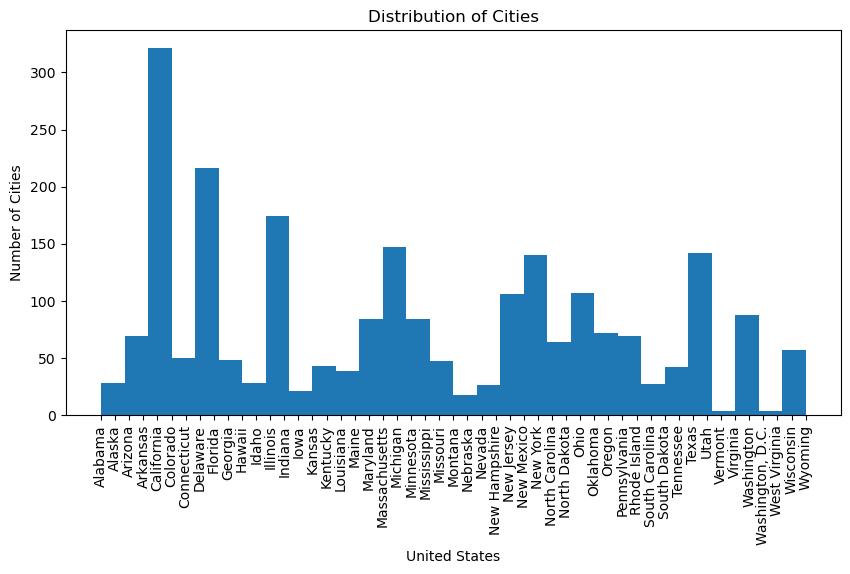

In [57]:
#Histogram of cities

#Use of plt API
#fig is figure, ax is axis   Y(1) is VERTICAL and X(1) is HORIZONTAL
fig, ax = plt.subplots(1, 1, figsize=(10, 5))   

#groupby is used for aggregation.  only CITY and STATE columns used
data = us_cities[['City', 'State']].groupby('City').max().sort_values(by=['State'])

plt.hist(x=data, bins=30)
plt.ylabel('Number of Cities')
plt.xlabel('United States')
plt.title('Distribution of Cities')
plt.xticks(rotation=90)
plt.show()
